In [109]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv("data.csv", header='infer')
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [111]:
y = data.iloc[:,1]

In [112]:
data.drop(["Attrition", "EmployeeCount", "EmployeeNumber"], axis=1, inplace=True)
data.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [113]:
orig_columns = pd.get_dummies(data).columns
# orig_columns

In [114]:
X = pd.get_dummies(data, drop_first=True)
# X.columns
X.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [115]:
y = y.map(dict(Yes=1, No=0))
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [116]:
# fig = plt.figure(figsize=(14,12.5))
# sns.heatmap(X.corr())
# plt.savefig("heatmap_1.jpg", dpi=300)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [118]:
scaler = MinMaxScaler()

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Random Forest Feature Selection

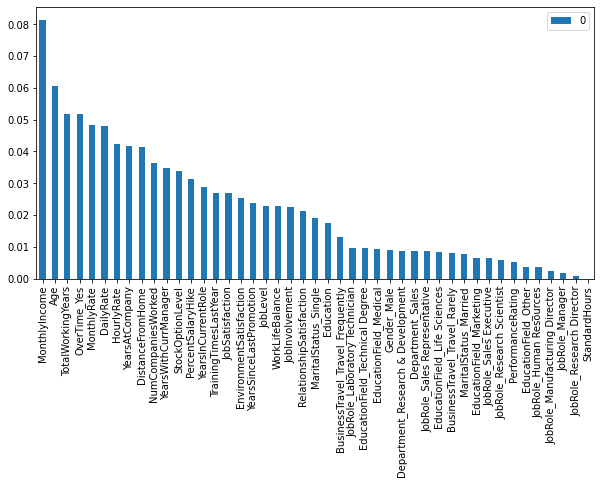

In [123]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
feature_table=pd.DataFrame(index=X_train.columns,data=rf.feature_importances_)
feature_table.sort_values(0,ascending=False).plot(kind='bar', figsize=(10,5));
plt.savefig("RF_top25.jpg", bbox_inches='tight', dpi=300)

In [83]:
top25_rfc = feature_table.sort_values(0,ascending=False).index[:25]
top25_rfc

Index(['MonthlyIncome', 'Age', 'TotalWorkingYears', 'OverTime_Yes',
       'DailyRate', 'MonthlyRate', 'YearsAtCompany', 'HourlyRate',
       'DistanceFromHome', 'PercentSalaryHike', 'NumCompaniesWorked',
       'YearsInCurrentRole', 'StockOptionLevel', 'YearsWithCurrManager',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'MaritalStatus_Single', 'WorkLifeBalance',
       'RelationshipSatisfaction', 'JobLevel', 'JobInvolvement', 'Education',
       'BusinessTravel_Travel_Frequently'],
      dtype='object')

In [84]:
X_train_rfc = X_train.loc[:, top25_rfc]
X_test_rfc = X_test.loc[:, top25_rfc]

In [85]:
X_train_rfc.head(3)

,MonthlyIncome,Age,TotalWorkingYears,OverTime_Yes,DailyRate,MonthlyRate,YearsAtCompany,HourlyRate,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,YearsInCurrentRole,StockOptionLevel,YearsWithCurrManager,TrainingTimesLastYear,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,MaritalStatus_Single,WorkLifeBalance,RelationshipSatisfaction,JobLevel,JobInvolvement,Education,BusinessTravel_Travel_Frequently
714,17399,50,32,0,1126,6615,5,66,1,22,9,4,1,3,1,1,4,4,0,2,3,4,3,2,0
135,4941,36,7,0,216,2819,3,84,6,20,6,2,2,1,0,0,2,2,0,3,4,2,3,2,0
1271,2679,21,1,0,337,4567,1,31,7,13,1,0,0,0,3,1,2,2,1,3,2,1,3,1,0


In [86]:
LR_rfc = LogisticRegression(max_iter=10000)
LR_rfc.fit(X_train_rfc, y_train)

LogisticRegression(max_iter=10000)

In [87]:
y_pred_train_rfc = LR_rfc.predict(X_train_rfc)
y_pred_test_rfc = LR_rfc.predict(X_test_rfc)

In [88]:
f1_score(y_train, y_pred_train_rfc)

0.5074626865671641

In [89]:
f1_score(y_test, y_pred_test_rfc)

0.3877551020408163

# VIF Feature Selection

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
def calc_VIF(x):
    
    vif = pd.DataFrame()
    vif['variables']=x.columns
    vif ["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

In [92]:
VIF = calc_VIF(X_train)
highVIF = VIF[VIF["VIF"]>=10]
highVIF

,variables,VIF
7,JobLevel,15.491914
9,MonthlyIncome,19.053603
15,StandardHours,449.304269
26,Department_Research & Development,42.918083
27,Department_Sales,42.215218
28,EducationField_Life Sciences,26.093664
29,EducationField_Marketing,11.554107
30,EducationField_Medical,23.370105
40,JobRole_Sales Executive,13.951957


In [93]:
highVIF['variables'].values

array(['JobLevel', 'MonthlyIncome', 'StandardHours',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'JobRole_Sales Executive'], dtype=object)

In [94]:
X_train_vif = X_train.drop(highVIF['variables'].values, axis=1)
X_test_vif = X_test.drop(highVIF['variables'].values, axis=1)

In [95]:
LR_vif = LogisticRegression(max_iter=10000)

In [96]:
LR_vif.fit(X_train_vif, y_train)

LogisticRegression(max_iter=10000)

In [97]:
y_pred_train_vif = LR_vif.predict(X_train_vif)
y_pred_test_vif = LR_vif.predict(X_test_vif)

In [98]:
f1_score(y_train, y_pred_train_vif)

0.5874125874125875

In [99]:
f1_score(y_test, y_pred_test_vif)

0.4242424242424242

# Weighted Logistic Regression

In [100]:
w = {0:237, 1:1233}

In [101]:
LR_wt = LogisticRegression(max_iter=10000, class_weight=w)

In [102]:
LR_wt.fit(X_train_vif, y_train)

LogisticRegression(class_weight={0: 237, 1: 1233}, max_iter=10000)

In [103]:
y_pred_train_wt = LR_wt.predict(X_train_vif)
y_pred_test_wt = LR_wt.predict(X_test_vif)

In [104]:
f1_score(y_train, y_pred_train_wt)

0.5479452054794521

In [105]:
f1_score(y_test, y_pred_test_wt)

0.4338624338624339